# Marketing Campaigns Analysis

## 1. Import libraries

In [2]:
# from google.colab import drive
# drive.mount("/content/drive")

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
HEIGHT_PLOTLY = 500
WIDTH_PLOTLY = 900

In [5]:
%cd /content/drive/MyDrive/Final_DDDM

[WinError 3] The system cannot find the path specified: '/content/drive/MyDrive/Final_DDDM'
h:\Marketing_Campain_Analyst


In [6]:
%ls

 Volume in drive H is Code Project
 Volume Serial Number is 9EB4-57A6

 Directory of h:\Marketing_Campain_Analyst

11/12/2024  07:24 CH    <DIR>          .
11/12/2024  07:24 CH    <DIR>          ..
11/12/2024  07:23 CH    <DIR>          Data
11/12/2024  07:21 CH    <DIR>          Docs
11/12/2024  08:16 CH         3.520.632 Final_Report_official.ipynb
11/12/2024  07:23 CH            18.339 marketing_eda_rfm (1).ipynb
11/12/2024  07:20 CH                27 README.md
11/12/2024  07:21 CH    <DIR>          Report
11/12/2024  07:24 CH    <DIR>          Topic
               3 File(s)      3.538.998 bytes
               6 Dir(s)  78.544.760.832 bytes free


In [7]:
market_data = pd.read_csv("H:/Marketing_Campain_Analyst/Data/marketing-data (3).csv")
market_data.head(5)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [8]:
market_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

###a. Demographic Analysis

- What is the distribution of customer income? Are there any noticeable
patterns or outliers?


In [9]:
import plotly.express as px

# Assuming 'Income' is the column name for income data in your market_data DataFrame
fig = px.histogram(market_data, x="Income", nbins=50, title="Distribution of Income")
fig.update_layout(width=WIDTH_PLOTLY, height=HEIGHT_PLOTLY)  # Set smaller dimensions
fig.show()

fig_box = px.box(market_data, x="Income", title="Boxplot of Income")
fig_box.update_layout(width=WIDTH_PLOTLY, height=HEIGHT_PLOTLY)  # Set smaller dimensions
fig_box.show()

In [10]:
print(market_data["Income"].describe())

count      2205.000000
mean      51622.094785
std       20713.063826
min        1730.000000
25%       35196.000000
50%       51287.000000
75%       68281.000000
max      113734.000000
Name: Income, dtype: float64


In [11]:
market_data["Income"].mode()

0    7500.0
Name: Income, dtype: float64

In [12]:
def outliers_detection(data, col):
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr

    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    return outliers

outliers_detection(market_data, "Income")

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall


There are no outliers in the customer income section.

The histogram appers to have a **bell-shaped curved** meaning that the data might follow a normal-like distribution. The peak is between 40k-60k, indicating most incomes fall withing this range with the mean is about 51k approximately.




**Plot the distribution by the Martial Status**

- How are customers distributed across different education levels and marital
statuses?

In [13]:
from sklearn.preprocessing import LabelEncoder


martial_data = market_data[['marital_Divorced', 'marital_Married',
                              'marital_Single', 'marital_Together',
                              'marital_Widow']]

# Combine education columns into a single column
market_data['martial'] = martial_data.idxmax(axis=1)

# Initialize LabelEncoder
martial_le = LabelEncoder()

# Fit and transform the education column
market_data['martial'] = martial_le.fit_transform(market_data['martial'])

martial_label = dict(zip(martial_le.classes_, martial_le.transform(martial_le.classes_)))
martial_idx2label = {idx: label for label, idx in martial_label.items()}

print(martial_label)

{'marital_Divorced': 0, 'marital_Married': 1, 'marital_Single': 2, 'marital_Together': 3, 'marital_Widow': 4}


In [14]:
# prompt: Draw the distribution of income based on martial plotly using boxplot each column has different color

import plotly.graph_objects as go

martial_idx2label = {
    0: "Divorced",
    1: "Married",
    2: "Single",
    3: "Together",
    4: "Widow"
}

# Assuming 'Income' is the income column and 'martial' is the marital status column
fig = go.Figure()

for martial_status in market_data['martial'].unique():
  subset = market_data[market_data['martial'] == martial_status]
  fig.add_trace(go.Box(y=subset['Income'],
                       name=martial_idx2label[martial_status]))

fig.update_layout(title='Income Distribution by Marital Status',
                  yaxis_title='Income',
                  xaxis_title='Marital Status',
                  width=WIDTH_PLOTLY, height=HEIGHT_PLOTLY)

fig.show()

**Plot the distribution by the Educational Status**

In [15]:
from sklearn.preprocessing import LabelEncoder


education_data = market_data[['education_2n Cycle', 'education_Basic',
                              'education_Graduation', 'education_Master',
                              'education_PhD']]

# Combine education columns into a single column
market_data['education'] = education_data.idxmax(axis=1)

# Initialize LabelEncoder
education_le = LabelEncoder()

# Fit and transform the education column
market_data['education'] = education_le.fit_transform(market_data['education'])

education_label = dict(zip(education_le.classes_,
                           education_le.transform(education_le.classes_)))
education_idx2label = {idx: label for label, idx in education_label.items()}

print(education_label)


{'education_2n Cycle': 0, 'education_Basic': 1, 'education_Graduation': 2, 'education_Master': 3, 'education_PhD': 4}


In [16]:
education_idx2label

{0: 'education_2n Cycle',
 1: 'education_Basic',
 2: 'education_Graduation',
 3: 'education_Master',
 4: 'education_PhD'}

In [17]:
fig = go.Figure()

for educational_status in market_data['education'].unique():
  subset = market_data[market_data['education'] == educational_status]
  fig.add_trace(go.Box(y=subset['Income'],
                       name=education_idx2label[educational_status]))

fig.update_layout(title='Income Distribution by Educational Level',
                  yaxis_title='Income',
                  xaxis_title='Educational Level',
                  width=WIDTH_PLOTLY, height=HEIGHT_PLOTLY)

fig.show()

### b. Spending Behavior
- Which product category (e.g., wines, meats, sweets) has the highest and lowest
average spending?

In [71]:
# prompt: Plot the boxplot for all product categories (wines, meats, sweets) and compare the average spending draw in Plotly

# Assuming 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds' are the columns for product spending

# Create a new DataFrame with only the relevant columns
spending_data = market_data[['MntWines', 'MntMeatProducts', 'MntSweetProducts',
                             'MntFruits', 'MntFishProducts', 'MntGoldProds']]

# Rename columns for better readability in the plot
spending_data = spending_data.rename(columns={
    'MntWines': 'Wines',
    'MntMeatProducts': 'Meats',
    'MntSweetProducts': 'Sweets',
    'MntFruits': 'Fruits',
    'MntFishProducts': 'Fish',
    'MntGoldProds': 'Gold'
})

# Melt the DataFrame to create a long-format DataFrame for plotting
spending_melted = spending_data.melt(var_name='Product Category', value_name='Spending')


fig = px.box(spending_melted,
             x='Product Category',
             y='Spending',
             title='Spending Distribution by Product Category (in USD)',
             color='Product Category')


fig.update_layout(width=WIDTH_PLOTLY, height=HEIGHT_PLOTLY)

fig.show()


# Calculate the average spending for each category
average_spending = spending_data.mean()

# Create a bar chart of the average spending
fig_bar = px.bar(average_spending,
                 x=average_spending.index,
                 y=average_spending.values,
                 title='Average Spending per Product Category (in USD)')

fig_bar.update_layout(width=WIDTH_PLOTLY, height=HEIGHT_PLOTLY,
                      xaxis_title="Product Category",
                      yaxis_title="Average Spending")

fig_bar.show()

- What is the total spending across all categories (MntTotal) for customers with varying income levels?

In [19]:
# prompt: Can you display the correlation of this (income and Total Spending) and write into the plot

# Assuming 'Income' and 'MntTotal' are columns in your market_data DataFrame
fig = px.scatter(market_data, x="Income", y="MntTotal",
                 title="Total Spending (MntTotal) vs. Income",
                 labels={"MntTotal": "Total Spending", "Income": "Income"},
                 ) # Add trendline

fig.update_layout(width=WIDTH_PLOTLY, height=HEIGHT_PLOTLY)

# Calculate the correlation
correlation = market_data['Income'].corr(market_data['MntTotal'])

# Add correlation to the plot
fig.add_annotation(
    x=0.05,  # Adjust x position as needed
    y=0.9,  # Adjust y position as needed
    text=f"Correlation: {correlation:.2f}",
    showarrow=False,
    font=dict(size=15, color="red"),  # Adjust font size as needed
    xref="paper",
    yref="paper"
)

fig.show()

The Pearson Correlation of this plot is: 0.82

### c. Campaign Effectiveness:

- What percentage of customers accepted offers in each campaign
(AcceptedCmp1-5)? Is there a trend in acceptance rates across campaigns?


In [20]:
# Create the new column 'AcceptedCampaign'
market_data['AcceptedCampaign'] = 0

# Iterate through the accepted campaigns and assign corresponding values
for i in range(1, 6):
    market_data.loc[market_data[f'AcceptedCmp{i}'] == 1, 'AcceptedCampaign'] = i

In [21]:
# Calculate the percentage of customers who accepted each campaign 
campaign_acceptance_counts = market_data['AcceptedCampaign'].value_counts(normalize=True) * 100

# Create the bar chart using Plotly Express
fig = px.bar(
    campaign_acceptance_counts,
    x=campaign_acceptance_counts.index,
    y=campaign_acceptance_counts.values,
    labels={'x': 'Accepted Campaign', 'y': 'Percentage of Customers'},
    title='Percentage of Customers Who Accepted Each Campaign',
    color=campaign_acceptance_counts.index  # Use campaign number for color
)

# Update layout for better visualization
fig.update_layout(
    width=WIDTH_PLOTLY,
    height=HEIGHT_PLOTLY,
    xaxis=dict(
        tickmode='array',
        tickvals=campaign_acceptance_counts.index,
        ticktext=['Don\'t accepted campaign' if val == 0 else val for val in campaign_acceptance_counts.index]
    ),
    yaxis=dict(tickformat=".0%"),  # Format y-axis with percentage
    coloraxis_colorbar=dict(
        tickvals=campaign_acceptance_counts.index,
        ticktext=['Don\'t accepted campaign' if val == 0 else val for val in campaign_acceptance_counts.index]
    )
)

# Add percentage values to the bars
fig.update_traces(texttemplate='%{y:.2f}%', textposition='outside')

fig.show()


In [22]:
# Filter out rows where AcceptedCampaign is greater than 0
accepted_campaigns = market_data[market_data['AcceptedCampaign'] > 0]

# Calculate the percentage of customers who accepted each campaign (only for AcceptedCampaign > 0)
campaign_acceptance_counts = accepted_campaigns['AcceptedCampaign'].value_counts(normalize=True) * 100

# Create the bar chart using Plotly Express
fig = px.bar(
    campaign_acceptance_counts,
    x=campaign_acceptance_counts.index,
    y=campaign_acceptance_counts.values,
    labels={'x': 'Accepted Campaign', 'y': 'Percentage of Customers'},
    title='Percentage of Customers Who Accepted Each Campaign',
    color=campaign_acceptance_counts.index  # Use campaign number for color
)

# Update layout for better visualization
fig.update_layout(width=WIDTH_PLOTLY, height=HEIGHT_PLOTLY)
fig.update_traces(texttemplate='%{y:.2f}%', textposition='outside')  # Display percentage values

fig.show()

# Bản copy

In [23]:
# Filter out rows where AcceptedCampaign is greater than 0
accepted_campaigns = market_data[market_data['AcceptedCampaign'] > 0]

# Calculate the percentage of customers who accepted each campaign (only for AcceptedCampaign > 0)
campaign_acceptance_counts = accepted_campaigns['AcceptedCampaign'].value_counts(normalize=True) * 100

# Create the bar chart using Plotly Express
fig = px.bar(
    campaign_acceptance_counts,
    x=campaign_acceptance_counts.index,
    y=campaign_acceptance_counts.values,
    labels={'x': 'Accepted Campaign', 'y': 'Percentage of Customers'},
    title='Percentage of Customers Who Accepted Each Campaign',
    color=campaign_acceptance_counts.index  # Use campaign number for color
)

# Update layout for proper percentage display on y-axis
fig.update_layout(
    width=WIDTH_PLOTLY,
    height=HEIGHT_PLOTLY,
    yaxis=dict(
        tickformat='.0%',  # Hiển thị giá trị với dấu %
        title='Percentage of Customers'
    )
)

# Add percentage values on the bars (optional)
fig.update_traces(texttemplate='%{y:.2f}%', textposition='outside')

fig.show()



- Are customers who accepted previous campaigns (AcceptedCmp1-5) more likely to
accept the most recent campaign (Response)?

In [24]:
accepted_campaigns = market_data[market_data['AcceptedCampaign'] > 0]

fig = go.Figure()

# Iterate over unique categories in AcceptedCampaign
for idx, accepted_value in enumerate(accepted_campaigns['AcceptedCampaign'].unique()):
    subset = accepted_campaigns[accepted_campaigns['AcceptedCampaign'] == accepted_value]
    counts = subset['Response'].value_counts()
    # Calculate percentages within the category
    percentages = counts / counts.sum() * 100

    # Add bar trace for Accepted
    fig.add_trace(go.Bar(
        x=[accepted_value],  # Use the AcceptedCampaign category as x
        y=[percentages.get(1, 0)],  # Percentage of 'Accepted' (response == 1)
        name='Accepted',  # Show label only once
        text=[f'{percentages.get(1, 0):.1f}%'],  # Display percentage
        showlegend=idx == 0,
        textposition='auto',
        marker_color='green'  # Optional: color for accepted
    ))

    # Add bar trace for Not Accepted
    fig.add_trace(go.Bar(
        x=[accepted_value],  # Use the AcceptedCampaign category as x
        y=[percentages.get(0, 0)],  # Percentage of 'Not Accepted' (response == 0)
        name='Not Accepted',  # Show label only once
        showlegend=idx == 0,
        text=[f'{percentages.get(0, 0):.1f}%'],  # Display percentage
        textposition='auto',
        marker_color='red'  # Optional: color for not accepted
    ))

fig.update_layout(
    title='Distribution of Accepted Campaigns by Most Recent Campaign',
    xaxis_title='Accepted Campaign',
    yaxis_title='Percentage',
    yaxis_tickformat='.1%',  # Display y-axis as percentages
    barmode='stack',  # Stack bars for clear comparison
    width=WIDTH_PLOTLY,
    height=HEIGHT_PLOTLY,
    showlegend=True  # Enable legend display
)

fig.show()

## d. Channel Preferences:
- Which purchase channel (e.g., web, catalog, store) is the most frequently used
across customers?

In [25]:
import plotly.graph_objects as go

# Create a bar plot using Plotly
fig = go.Figure()

# Calculate the total purchases for each category
total_deals = market_data['NumDealsPurchases'].sum()
total_webs = market_data['NumWebPurchases'].sum()
total_catalogs = market_data['NumCatalogPurchases'].sum()
total_stores = market_data['NumStorePurchases'].sum()

# Sum of all categories
total_sum = total_deals + total_webs + total_catalogs + total_stores

# Create a list of percentages for each category
percentages = [
    total_deals / total_sum ,
    total_webs / total_sum,
    total_catalogs / total_sum,
    total_stores / total_sum
]

# Create a bar plot with percentage values
fig.add_trace(go.Bar(
    x=['Deal Purchases', 'Web Purchases', 'Catalog Purchases', 'Store Purchases'],
    y=percentages,
    marker_color=['skyblue', 'lightcoral', 'lightgreen', 'orange']  # Custom colors
))

# Customize the layout
fig.update_layout(
    title='Distribution of Purchase Channel Frequently Used by Customers',
    xaxis_title='Purchase Category',
    yaxis_title='Percentage of Total Purchases',
    template='plotly_white',
        yaxis_tickformat='.1%',  # Display y-axis as percentages

    width=WIDTH_PLOTLY,
    height=HEIGHT_PLOTLY
)

# Add annotations for the percentage values
for i, value in enumerate(percentages):
    fig.add_annotation(
        x=['Deal Purchases', 'Web Purchases', 'Catalog Purchases', 'Store Purchases'][i],
        y=value,
        text=f'{value * 100:.2f}%',  # Display percentage with two decimal places
        showarrow=False,
        font=dict(size=12),
        yshift=10
    )

# Show the figure
fig.show()


In [26]:
# prompt: Group all the AcceptedCampaign and then plot y=['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases'] using plotly

# Assuming 'AcceptedCampaign' and the purchase columns exist in your DataFrame
import plotly.graph_objects as go

# Group by 'AcceptedCampaign' and calculate the mean of the specified columns
grouped_data = accepted_campaigns.groupby('AcceptedCampaign')[['NumDealsPurchases',
                                                               'NumWebPurchases',
                                                               'NumCatalogPurchases',
                                                               'NumStorePurchases']].sum().reset_index()

# Create the grouped bar chart
fig = go.Figure()
for col in ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']:
    fig.add_trace(go.Bar(
        x=grouped_data['AcceptedCampaign'],
        y=grouped_data[col],
        name=col
    ))

fig.update_layout(
    title='Total Purchases by Accepted Campaign',
    xaxis_title='Accepted Campaign',
    yaxis_title='Total Number of Purchases',
    barmode='group',  # Display bars side-by-side
    width=WIDTH_PLOTLY,
    height=HEIGHT_PLOTLY
)

fig.show()

In [27]:
# prompt: Group all the AcceptedCampaign and then plot y=['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases'] using plotly

# Assuming 'AcceptedCampaign' and the purchase columns exist in your DataFrame
import plotly.graph_objects as go

# Group by 'AcceptedCampaign' and calculate the mean of the specified columns
grouped_data = accepted_campaigns.groupby('AcceptedCampaign')[['NumDealsPurchases',
                                                               'NumWebPurchases',
                                                               'NumCatalogPurchases',
                                                               'NumStorePurchases']].mean().reset_index()

# Create the grouped bar chart
fig = go.Figure()
for col in ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']:
    fig.add_trace(go.Bar(
        x=grouped_data['AcceptedCampaign'],
        y=grouped_data[col],
        name=col
    ))

fig.update_layout(
    title='Mean Purchases by Accepted Campaign',
    xaxis_title='Accepted Campaign',
    yaxis_title='Mean Number of Purchases',
    barmode='group',  # Display bars side-by-side
    width=WIDTH_PLOTLY,
    height=HEIGHT_PLOTLY
)

fig.show()

In [28]:
accepted_campaigns[accepted_campaigns['AcceptedCampaign'] == 2][['NumDealsPurchases',
                                                               'NumWebPurchases',
                                                               'NumCatalogPurchases',
                                                               'NumStorePurchases']]

,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
802,1,7,3,7


- How does the number of website visits (NumWebVisitsMonth) relate to the number of website purchases (NumWebPurchases)?

In [29]:
import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression

# Assuming 'NumWebVisitsMonth' and 'NumWebPurchases' are in your market_data DataFrame

fig = px.scatter(market_data, x='NumWebVisitsMonth', y='NumWebPurchases',
                 title='Relationship between Website Visits and Purchases',
                 labels={'NumWebVisitsMonth': 'Number of Website Visits per Month',
                         'NumWebPurchases': 'Number of Website Purchases'})

fig.update_layout(width=WIDTH_PLOTLY, height=HEIGHT_PLOTLY)

# Calculate the correlation
correlation = market_data['NumWebVisitsMonth'].corr(market_data['NumWebPurchases'])

# Add correlation to the plot
fig.add_annotation(
    x=0.05,  # Adjust x position as needed
    y=0.9,  # Adjust y position as needed
    text=f"Correlation: {correlation:.2f}",
    showarrow=False,
    font=dict(size=15, color="red"),  # Adjust font size as needed
    xref="paper",
    yref="paper"
)

# Linear Regression
X = market_data[['NumWebVisitsMonth']]
y = market_data['NumWebPurchases']
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Add regression line to the plot
fig.add_trace(go.Scatter(x=X['NumWebVisitsMonth'], y=y_pred, mode='lines', name='Linear Regression'))

fig.show()

## e. Customer Segments:
- How do family dynamics (e.g., Kidhome, Teenhome) affect customer spending on
specific product categories like wines or sweets?

In [30]:
# prompt: Group the Kidhome and plot the distribution of MntWines  plotly (box plot and bar chart with different color)

# Group data by 'Kidhome' and get the distribution of 'MntWines'
kidhome_wine_spending = market_data.groupby('Kidhome')['MntWines'].mean().reset_index()
kidhome_labels = {0: '0 Kids', 1: '1 Kids', 2: '2 Kids'}

# Box plot
fig_box = px.box(
    market_data,
    x='Kidhome',
    y='MntWines',
    title='Distribution of Wines Spending by Number of Kids at Home',
    color='Kidhome',  # Color by Kidhome
    labels={
        'Kidhome': 'Number of Kids at Home',
        'MntWines': 'Wine Spending (in USD)'
    }
)

# Update x-axis and legend labels
fig_box.update_layout(
    width=WIDTH_PLOTLY,
    height=HEIGHT_PLOTLY,
    xaxis=dict(
        tickmode='array',
        tickvals=[0, 1, 2],
        ticktext=['0 Kids', '1 Kids', '2 Kids']  # Custom x-axis labels
    ),
    legend=dict(
        title='Kids at Home',
        traceorder='normal',
        itemsizing='constant',
    )
)
fig_box.for_each_trace(lambda trace: trace.update(name=kidhome_labels[int(trace.name)]))


fig_box.show()


# Bar chart
# fig_bar = px.bar(kidhome_wine_spending.reset_index(), x='Kidhome', y='MntWines',
#                  title='Average Wine Spending by Number of Kids at Home (Bar Chart)',
#                  color='Kidhome')  # Color by Kidhome
# fig_bar.update_layout(width=WIDTH_PLOTLY, height=HEIGHT_PLOTLY)
# fig_bar.show()

# Bar Chart
fig_bar = go.Figure()

# Add a bar for each Kidhome category
for kidhome_value in kidhome_wine_spending['Kidhome'].unique():
    avg_spending = kidhome_wine_spending.loc[kidhome_wine_spending['Kidhome'] == kidhome_value,
                                             'MntWines'].values[0]
    fig_bar.add_trace(go.Bar(
        x=[f"{kidhome_value} Kids"],  # Category label
        y=[avg_spending],       # Value for the bar
        name=f"{kidhome_value} Kids",  # Legend entry
        text=[f"{avg_spending:.2f}"],  # Display the value on the bar
        textposition='outside'         # Position text outside the bar
    ))

# Customize layout
fig_bar.update_layout(
    title='Average Wines Spending by Number of Kids at Home',
    xaxis=dict(title='Number of Kids at Home'),
    yaxis=dict(title='Average Spending on Wines Products (in USD)'),
    legend_title='Kids at Home',
    width=WIDTH_PLOTLY,
    height=HEIGHT_PLOTLY
)

fig_bar.show()

In [31]:
# prompt: Group the Kidhome and plot the distribution of MntWines  plotly (box plot and bar chart with different color)

# Group data by 'Kidhome' and get the distribution of 'MntWines'
kidhome_wine_spending = market_data.groupby('Kidhome')['MntSweetProducts'].mean().reset_index()
kidhome_labels = {0: '0 Kids', 1: '1 Kids', 2: '2 Kids'}

# Box plot
fig_box = px.box(
    market_data,
    x='Kidhome',
    y='MntSweetProducts',
    title='Sweets Spending by Number of Kids at Home',
    color='Kidhome',  # Color by Kidhome
    labels={
        'Kidhome': 'Number of Kids at Home',
        'MntSweetProducts': 'Sweets Spending (in USD)'
    }
)

# Update x-axis and legend labels
fig_box.update_layout(
    width=WIDTH_PLOTLY,
    height=HEIGHT_PLOTLY,
    xaxis=dict(
        tickmode='array',
        tickvals=[0, 1, 2],
        ticktext=['0 Kids', '1 Kids', '2 Kids']  # Custom x-axis labels
    ),
    legend=dict(
        title='Kids at Home',
        traceorder='normal',
        itemsizing='constant',
    )
)

# Update legend trace names
fig_box.for_each_trace(lambda trace: trace.update(name=kidhome_labels[int(trace.name)]))

fig_box.show()


# Bar Chart
fig_bar = go.Figure()

# Add a bar for each Kidhome category
for kidhome_value in kidhome_wine_spending['Kidhome'].unique():
    avg_spending = kidhome_wine_spending.loc[kidhome_wine_spending['Kidhome'] == kidhome_value,
                                             'MntSweetProducts'].values[0]
    fig_bar.add_trace(go.Bar(
        x=[f"{kidhome_value} Kids"],  # Category label
        y=[avg_spending],       # Value for the bar
        name=f"{kidhome_value} Kids",  # Legend entry
        text=[f"{avg_spending:.2f}"],  # Display the value on the bar
        textposition='outside'         # Position text outside the bar
    ))

# Customize layout
fig_bar.update_layout(
    title='Average Sweets Spending by Number of Kids at Home',
    xaxis=dict(title='Number of Kids at Home'),
    yaxis=dict(title='Average Spending on Sweet Products (in USD)'),
    legend_title='Kids at Home',
    width=WIDTH_PLOTLY,
    height=HEIGHT_PLOTLY
)

fig_bar.show()

- Are customers who have complained in the last two years (Complain) spending
significantly more or less than those who haven’t?

In [72]:
# Group data by 'Complain' and calculate the mean of 'MntTotal'
complain_spending = market_data.groupby('Complain',
                                        as_index=False)['MntTotal'].mean() \
                                        .reset_index()

complain_distribution = market_data[['Complain', 'MntTotal']]
complain_distribution['Complain'] = complain_distribution['Complain'].map({0: 'No', 1: 'Yes'})

fig = px.box(
    complain_distribution,
    x='Complain',
    y='MntTotal',
    color='Complain',  # Add color to differentiate categories
    title='Total Spending Distribution by Complaint Status (in USD)',
    labels={'Complain': 'Complained in the last 2 years',
            'MntTotal': 'Total Spending'
            }
)




# Customize layout
fig.update_layout(
    width=WIDTH_PLOTLY,
    height=HEIGHT_PLOTLY,
    legend_title='Complaint Status'
)

fig.show()

In [33]:
# Create a bar chart to visualize the average spending for customers
# who have complained vs. those who haven't
# Create a bar chart using go.Figure()
fig = go.Figure()

no_value = complain_spending.loc[complain_spending['Complain'] == 0, 'MntTotal'].values[0]
# Add bar for "No" complaints (Complain = 0)
fig.add_trace(go.Bar(
    x=['No'],  # Label for "No" complaints
    y=[no_value],
    name='No',  # Legend entry
    text=[f"{no_value:.2f}"],
    marker_color='blue'  # Color for "No" complaints
))


yes_value = complain_spending.loc[complain_spending['Complain'] == 1, 'MntTotal'].values[0]
# Add bar for "Yes" complaints (Complain = 1)
fig.add_trace(go.Bar(
    x=['Yes'],  # Label for "Yes" complaints
    y=[yes_value],
    name='Yes',  # Legend entry
    text=[f"{yes_value:.2f}"],
    marker_color='red'  # Color for "Yes" complaints
))

# Update layout with title, labels, and size
fig.update_layout(
    title='Average Total Spending by Complaint Status',
    xaxis=dict(title='Complained Status'),
    yaxis=dict(title='Average Total Spending'),
    legend_title='Complaint Status',
    width=WIDTH_PLOTLY,
    height=HEIGHT_PLOTLY
)

fig.show()

## f. Recency and Response
- Is there a relationship between the recency of a customer’s last purchase (Recency) and their likelihood of accepting the latest campaign (Response)?

In [34]:
# prompt: Draw the plot between the recency and the response (recency is the numerical variable and response is the categorical)

# Assuming 'Recency' and 'Response' are columns in your 'market_data' DataFrame

response_label = {0: 'No', 1: 'Yes'}

fig = px.box(market_data, x='Response', y='Recency',
             color='Response',  # Color the boxes by response
             title='Days Since Last Store Purchase vs Campaign Feedback',
             labels={'Response': 'Response Status', 'Recency': 'Recency (In Days)'})


fig.for_each_trace(lambda trace: trace.update(name=response_label[int(trace.name)]))

fig.update_layout(
    width=WIDTH_PLOTLY,
    height=HEIGHT_PLOTLY,
    xaxis=dict(
        tickmode='array',
        tickvals=[0, 1],
        ticktext=['No', 'Yes']  # Custom x-axis labels
    ),
    legend=dict(
        title='Response Status',
        traceorder='normal',
        itemsizing='constant',
    )
)



# fig.update_layout(width=WIDTH_PLOTLY, height=HEIGHT_PLOTLY)
fig.show()

In [35]:
import plotly.graph_objects as go

# Calculate the mean recency for each response group
mean_recency_by_response = market_data.groupby('Response')['Recency'].mean().reset_index()

# Define colors for each response status
color_map = {1: 'blue', 0: 'red'}
response_label = {0: 'No', 1: 'Yes'}
# Create the bar chart
fig = go.Figure()
# Add bar for each response group explicitly to ensure a legend appears
for response in mean_recency_by_response['Response']:
    fig.add_trace(go.Bar(
        x=[response_label[response]],  # Single response value
        y=mean_recency_by_response[mean_recency_by_response['Response'] == response]['Recency'],
        name=response_label[response],  # Add the response status to the legend
        marker_color=color_map[response],
        text=mean_recency_by_response[mean_recency_by_response['Response'] == response]['Recency'].round(0),
        textposition='auto'
    ))


# Update layout
fig.update_layout(
    title='Mean Recency by Response Status',
    xaxis_title='Response Status',
    yaxis_title='Mean Recency (in Days)',
    legend_title='Response',

    width=WIDTH_PLOTLY,  # Assuming WIDTH_PLOTLY is defined
    height=HEIGHT_PLOTLY  # Assuming HEIGHT_PLOTLY is defined
)

# Update legend labels and axis tick labels
fig.update_layout(
    legend=dict(
        title='Response Status'
    )
)

fig.show()


We shall test if the mean recency days in the `No` Response group is actually larger than the `Yes` Reponse group.

Use the two-sample one-sided T-Test

In [36]:
from scipy.stats import ttest_ind

# Separate Recency data into two groups based on Response
recency_yes = market_data[market_data['Response'] == 1]['Recency']
recency_no = market_data[market_data['Response'] == 0]['Recency']

# Perform an independent two-sample t-test
t_stat, p_value_two_sided = ttest_ind(recency_no, recency_yes)

if t_stat > 0:
    p_value_one_sided = p_value_two_sided / 2
else:
    p_value_one_sided = 1

# Print results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value_one_sided}")

if p_value_one_sided < 0.05:
    print("Recency in No Group is larger than Yes Group")
else:
    print("Recency in No Group is smaller or equal to Yes Group.")


T-statistic: 9.601414903531198
P-value: 1.0284074296686587e-21
Recency in No Group is larger than Yes Group


In [37]:
# This code is for testing only (No use)

# import scipy.stats as stats

# # Sample data
# group1 = [5.1, 5.3, 5.7, 5.8, 6.0, 6.1, 6.5]  # Group 1 data
# group2 = [4.8, 5.0, 5.4, 5.6, 5.7, 5.9, 6.0]  # Group 2 data

# # Perform two-sample two-sided t-test
# t_stat, p_value_two_sided = stats.ttest_ind(group1, group2, equal_var=True)


# print(np.array(group1).mean())
# print(np.array(group2).mean())

# # Adjust p-value for one-sided test (H1: μ1 > μ2)
# if t_stat > 0:
#     p_value_one_sided = p_value_two_sided / 2
# else:
#     p_value_one_sided = 1  # If t-statistic is negative, p-value for H1: μ1 > μ2 is 1

# print("t-statistic:", t_stat)
# print("One-sided p-value (H1: μ1 > μ2):", p_value_one_sided)


## 2. Linear Regression (Supervised Learning)

We use the Linear Regression to model and verify if the linear relationship between variables in the dataset is statistically significant

**Income vs. Spending**: how does a customer’s yearly income predict their spending?

In [38]:
import statsmodels.api as sm
from scipy.stats import linregress

In [39]:
x_column = 'Income'
y_column = 'MntTotal'

df = market_data[[x_column, y_column]].dropna()

X = sm.add_constant(market_data[x_column])
y = market_data[y_column]

model = sm.OLS(y, X).fit()
print(model.summary())

slope, intercept, r_value, p_value, std_err =  \
        linregress(market_data[x_column], market_data[y_column])

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")
print(f"Standard Error: {std_err}")


                            OLS Regression Results                            
Dep. Variable:               MntTotal   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     4627.
Date:                Wed, 11 Dec 2024   Prob (F-statistic):               0.00
Time:                        21:00:30   Log-Likelihood:                -15896.
No. Observations:                2205   AIC:                         3.180e+04
Df Residuals:                    2203   BIC:                         3.181e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -618.6460     18.714    -33.058      0.0

Since the p-value of the `Income` variable is 0.000 which is less than the significance threshold (0.05), we reject the null hypothesis that is:
- $H_0$: There are no statistically signicant linear relationship between the variable `Income` and `Spending`.

Therefore, confirming the statistically significant linear relationship between the variable `Income` and `Spending`

R-square value is 0.667, explaining 67.7% of the variance in spending. which is a strong relationship for a single predictor

Confidence interval for the slope of the `Income` variable is [0.022, 0.024]. Since it does not include 0, this further supports a significant relationship

In [40]:
# Plot the data points and regression line

from scipy.stats import pearsonr
correlation, p_value = pearsonr(market_data['Income'], market_data['MntTotal'])
print(f"Correlation: {correlation}, P-value: {p_value}")


# Generate the regression line
x_line = np.linspace(df[x_column].min(), df[x_column].max(), 100)
y_line = slope * x_line + intercept
x_line = x_line[y_line > 0]
y_line = y_line[y_line > 0]

# Create the Plotly figure
fig = go.Figure()


# Add scatter plot for the data points
fig.add_trace(go.Scatter(
    x=df[x_column],
    y=df[y_column],
    mode='markers',
    name='Data Points',
    marker=dict(color='blue', opacity=0.6)
))

# Add regression line
fig.add_trace(go.Scatter(
    x=x_line,
    y=y_line,
    mode='lines',
    name=f'Regression Line (y = {slope:.2f}x + {intercept:.2f})',
    line=dict(color='red')
))

# Update layout
fig.update_layout(
    title='Linear Regression: Income vs. Spending',
    xaxis_title='Income',
    yaxis_title='Total Spending (in USD)',
    legend_title='Legend',
    width=WIDTH_PLOTLY,
    height=HEIGHT_PLOTLY,
    annotations=[
        dict(
            x=df[x_column].mean() // 2,  # Position the text near the mean Income
            y=df[y_column].max(),   # Position the text near the max Spending
            text=f"Correlation: {correlation:.2f}",
            showarrow=False,
            font=dict(size=14, color="black"),
            align="center",
            bgcolor="rgba(255, 255, 255, 0.7)",  # Add a background for better visibility
            bordercolor="black",
            borderwidth=1
        )
    ]
)

fig.show()

Correlation: 0.8230660021398378, P-value: 0.0


**Website Visits vs. Website Purchases**: can the number of website visits in the last
month predict the number of website purchases?

In [41]:
x_column = 'NumWebVisitsMonth'
y_column = 'NumWebPurchases'

df = market_data[[x_column, y_column]].dropna()

X = sm.add_constant(market_data[x_column])
y = market_data[y_column]

model = sm.OLS(y, X).fit()
print(model.summary())

slope, intercept, r_value, p_value, std_err =  \
        linregress(market_data[x_column], market_data[y_column])

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")
print(f"Standard Error: {std_err}")


                            OLS Regression Results                            
Dep. Variable:        NumWebPurchases   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     8.350
Date:                Wed, 11 Dec 2024   Prob (F-statistic):            0.00389
Time:                        21:00:30   Log-Likelihood:                -5344.6
No. Observations:                2205   AIC:                         1.069e+04
Df Residuals:                    2203   BIC:                         1.070e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.4726      0.14

In [42]:
# Plot the data points and regression line

from scipy.stats import pearsonr
correlation, p_value = pearsonr(market_data['NumWebVisitsMonth'],
                                market_data['NumWebPurchases'])
print(f"Correlation: {correlation}, P-value: {p_value}")


# Generate the regression line
x_line = np.linspace(df[x_column].min(), df[x_column].max(), 100)
y_line = slope * x_line + intercept
x_line = x_line[y_line > 0]
y_line = y_line[y_line > 0]

# Create the Plotly figure
fig = go.Figure()


# Add scatter plot for the data points
fig.add_trace(go.Scatter(
    x=df[x_column],
    y=df[y_column],
    mode='markers',
    name='Data Points',
    marker=dict(color='blue', opacity=0.6)
))

# Add regression line
fig.add_trace(go.Scatter(
    x=x_line,
    y=y_line,
    mode='lines',
    name=f'Regression Line (y = {slope:.2f}x + {intercept:.2f})',
    line=dict(color='red')
))

# Update layout
fig.update_layout(
    title='Linear Regression: Web Visits Per Month vs. Web Purchases',
    xaxis_title='Web Visits Per Month',
    yaxis_title='Total of Purchases in Web',
    legend_title='Legend',
    width=WIDTH_PLOTLY,
    height=HEIGHT_PLOTLY,
    annotations=[
        dict(
            x=df[x_column].mean() // 2,  # Position the text near the mean Income
            y=df[y_column].max(),   # Position the text near the max Spending
            text=f"Correlation: {correlation:.2f}",
            showarrow=False,
            font=dict(size=14, color="black"),
            align="center",
            bgcolor="rgba(255, 255, 255, 0.7)",  # Add a background for better visibility
            bordercolor="black",
            borderwidth=1
        )
    ]
)

fig.show()

Correlation: -0.06144992032312144, P-value: 0.003894016056977901


1. **Regression Coefficients**:

The slope of the regression line is -0.0697, indicating a slight negative relationship between website visits and purchases. For every additional website visit, the predicted number of purchases decreases by approximately 0.07 (on average).

2. **R-squared Value**:


The $R^{2}$ value is 0.004, meaning that only 0.4% of the variability in website purchases is explained by the number of website visits. This indicates a very weak relationship.
3. **Statistical Significance**:

The p-value for the slope is 0.0039, which is less than the typical significance threshold of 0.05. This suggests that the relationship between website visits and purchases is statistically significant. However, statistical significance does not imply practical significance.

Therefore:
- The number of website visits is not a strong predicator of website purchases. Maybe, there are other factors are likely driving website purchases

- Although the p-value is significant, the effect size (slope) is small and the relationship is weak. This might indicate that customers visiting the website more frequently are not necessarily making more purchases, and perhaps other variables (like product interest, discounts, or user intent) should be explored.

**Family Size vs. Spending**: does the number of children and teenagers in a
household predict spending on certain products?

We first model the relationships in spending on Sweet Products

In [43]:
# prompt: Use the Kidhome and The spending on sweets and model the linear relationship

# Assuming 'Kidhome' represents the number of children and 'Teenhome' represents the number of teenagers
# and 'MntTotal' represents the total spending.  Replace with your actual column names if different.

import statsmodels.api as sm
from scipy.stats import linregress
import numpy as np
import plotly.graph_objects as go

# Create a 'FamilySize' column
market_data['FamilySize'] = market_data['Kidhome'] + market_data['Teenhome']

x_column = 'FamilySize'
y_column = 'MntSweetProducts'

df = market_data[[x_column, y_column]].dropna()

X = sm.add_constant(market_data[x_column])
y = market_data[y_column]

model = sm.OLS(y, X).fit()
print(model.summary())

slope, intercept, r_value, p_value, std_err = linregress(market_data[x_column], market_data[y_column])

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")
print(f"Standard Error: {std_err}")

# Generate the regression line
x_line = np.linspace(df[x_column].min(), df[x_column].max(), 100)
y_line = slope * x_line + intercept
# x_line = x_line[y_line > 0]  # Ensure y-values are positive
# y_line = y_line[y_line > 0]


# Create the Plotly figure
fig = go.Figure()

# Add scatter plot for the data points
fig.add_trace(go.Scatter(
    x=df[x_column],
    y=df[y_column],
    mode='markers',
    name='Data Points',
    marker=dict(color='blue', opacity=0.6)
))

# Add regression line
fig.add_trace(go.Scatter(
    x=x_line,
    y=y_line,
    mode='lines',
    name=f'Regression Line (y = {slope:.2f}x + {intercept:.2f})',
    line=dict(color='red')
))


fig.update_layout(
    title='Linear Regression: Family Size vs. Spending on Sweets',
    xaxis_title='Family Size',
    yaxis_title='Total Spending (in USD)',
    legend_title='Legend',
    width=WIDTH_PLOTLY,
    height=HEIGHT_PLOTLY
)

fig.show()

                            OLS Regression Results                            
Dep. Variable:       MntSweetProducts   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     397.9
Date:                Wed, 11 Dec 2024   Prob (F-statistic):           1.64e-81
Time:                        21:00:30   Log-Likelihood:                -11141.
No. Observations:                2205   AIC:                         2.229e+04
Df Residuals:                    2203   BIC:                         2.230e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         47.4993      1.301     36.504      0.0

**Discount Purchases vs. Total Purchases**: does the number of discount purchases
predict the total number of purchases made in certain, or all channels?

In [44]:
# prompt: Use the Kidhome and The spending on sweets and model the linear relationship

# Assuming 'Kidhome' represents the number of children and 'Teenhome' represents the number of teenagers
# and 'MntTotal' represents the total spending.  Replace with your actual column names if different.

import statsmodels.api as sm
from scipy.stats import linregress
import numpy as np
import plotly.graph_objects as go

market_data['TotalPurchases'] = market_data[['NumDealsPurchases', 'NumCatalogPurchases',
                            'NumWebPurchases', 'NumStorePurchases']].sum(axis = 1)

x_column = 'NumDealsPurchases'
y_column = 'TotalPurchases'

df = market_data[[x_column, y_column]].dropna()

X = sm.add_constant(market_data[x_column])
y = market_data[y_column]

model = sm.OLS(y, X).fit()
print(model.summary())

slope, intercept, r_value, p_value, std_err = linregress(market_data[x_column], market_data[y_column])

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")
print(f"Standard Error: {std_err}")

# Generate the regression line
x_line = np.linspace(df[x_column].min(), df[x_column].max(), 100)
y_line = slope * x_line + intercept
# x_line = x_line[y_line > 0]  # Ensure y-values are positive
# y_line = y_line[y_line > 0]


# Create the Plotly figure
fig = go.Figure()

# Add scatter plot for the data points
fig.add_trace(go.Scatter(
    x=df[x_column],
    y=df[y_column],
    mode='markers',
    name='Data Points',
    marker=dict(color='blue', opacity=0.6)
))

# Add regression line
fig.add_trace(go.Scatter(
    x=x_line,
    y=y_line,
    mode='lines',
    name=f'Regression Line (y = {slope:.2f}x + {intercept:.2f})',
    line=dict(color='red')
))


fig.update_layout(
    title='Linear Regression: Number of Deals Purchase vs. Total of Purchases',
    xaxis_title=' Number of Deals Purchase',
    yaxis_title='Total of Purchases',
    legend_title='Legend',
    width=WIDTH_PLOTLY,
    height=HEIGHT_PLOTLY
)

fig.show()

                            OLS Regression Results                            
Dep. Variable:         TotalPurchases   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     303.3
Date:                Wed, 11 Dec 2024   Prob (F-statistic):           9.83e-64
Time:                        21:00:30   Log-Likelihood:                -7462.6
No. Observations:                2205   AIC:                         1.493e+04
Df Residuals:                    2203   BIC:                         1.494e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                11.6319      0.24

1. **Regression Coefficients:**

The slope of the regression line is 1.4045, indicating a positive relationship between the number of deals purchases and total purchases. For every additional deal purchase, the predicted number of total purchases increases by approximately 1.40 (on average).

2.  **R-squared Value:**

The $R^2$ value is 0.121, meaning that 12.1% of the variability in total purchases is explained by the number of deals purchases. This indicates a weak to moderate relationship.

3. **Statistical Significance:**

The p-value for the slope is 9.83e-64, which is far below the typical significance threshold of 0.05. This suggests that the relationship between deals purchases and total purchases is statistically significant. However, the low $R^2$ indicates that the practical significance may be limited.

Therefore:

- The number of deals purchases is not a strong predictor of total purchases. While the relationship is statistically significant, other factors are likely driving total purchases.

- Although the p-value is significant, the effect size (slope) is moderate, and the explanatory power ($R^2$) is relatively low. This suggests that customers making more deal purchases are only partially contributing to overall purchases, and other variables (such as customer demographics, income, or product preferences) should be explored for a more comprehensive understanding.

**Recency vs. Campaign Response:** does the number of days since a customer’s
last purchase influence their likelihood of accepting the latest campaign offer?

In [45]:
import plotly.express as px

# Assuming 'market_data' contains the columns 'Recency' and 'Response'

fig = px.box(
    market_data,
    x='Response',
    y='Recency',
    color='Response',  # Add color to differentiate categories
    title='Distribution of Recency by Response Status',
    labels={
        'Response': 'Response Status',
        'Recency': 'Recency (in Days)'
    },
    width=800,  # Adjust width as needed
    height=600  # Adjust height as needed
)

# Show the boxplot
fig.show()


In [46]:
x_column = 'Recency'
y_column = 'Response'

df = market_data[[x_column, y_column]].dropna()

# Separate Recency data into two groups based on Response (assuming Response is binary: 1 = Accepted, 0 = Not Accepted)
recency_accepted = df[df[y_column] == 1][x_column]
recency_not_accepted = df[df[y_column] == 0][x_column]

# Perform an independent two-sample t-test
t_stat, p_value_two_sided = ttest_ind(recency_not_accepted, recency_accepted, equal_var=False)

# Convert to one-sided p-value if needed
if t_stat > 0:
    p_value_one_sided = p_value_two_sided / 2
else:
    p_value_one_sided = 1 - (p_value_two_sided / 2)

# Print the results
print(f"T-statistic: {t_stat}")
print(f"Two-sided P-value: {p_value_two_sided}")
print(f"One-sided P-value: {p_value_one_sided}")

if p_value_one_sided < 0.05:
    print("The Recency in not Accepted Group > to the Recency in Accepted Group")
else:
    print("The Recency in not Accepted Group <= to the Recency in Accepted Group")

T-statistic: 9.810351629109048
Two-sided P-value: 8.830836431017925e-21
One-sided P-value: 4.4154182155089625e-21
The Recency in not Accepted Group > to the Recency in Accepted Group


## 3. Customer Segmentation (Unsupervised Learning): MOST IMPORTANT

We can perform segment the customers based using the RFM framework:
- R: Recency - how recent is the last purchase by a customer
- F: Frequency - how often does a customer make a purchase
- M: Monetary - how much does a customer pay in total

The link explained: https://blog.tomorrowmarketers.org/phan-tich-rfm-la-gi/

Reference Code: https://github.com/jasneekchugh/Customer-Segmentation-using-K-mean/blob/main/K-means%20clustering%20using%20RFM%20variables.ipynb

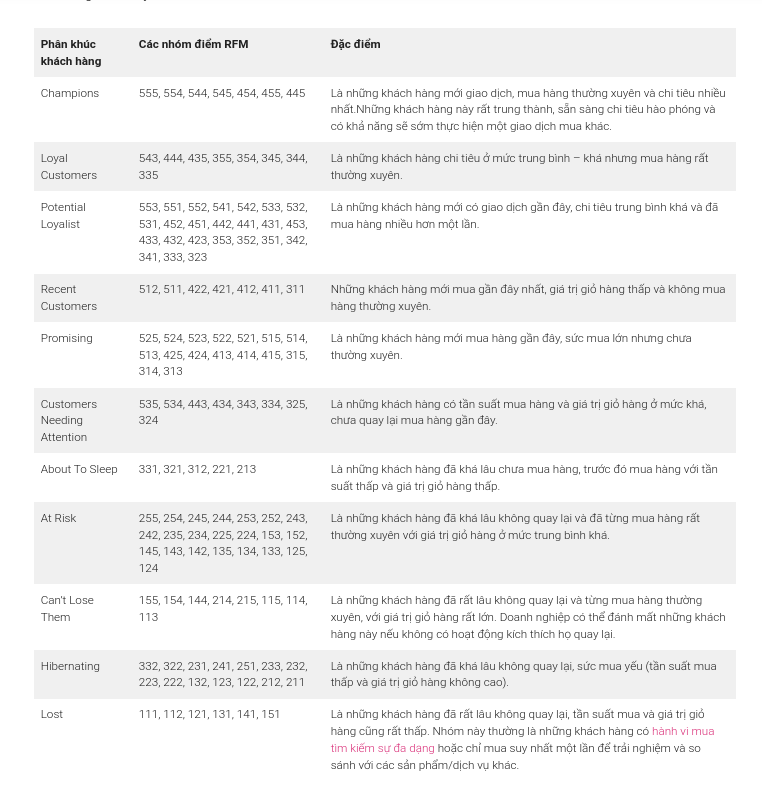

### Derive RFM features
In our data, the `Recency` value already exists, we need to derive Frequency and Monetary value from the existing columns.*italicized text*

In [47]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [48]:
market_data['Frequency'] = market_data[['NumDealsPurchases', 'NumCatalogPurchases',
                                        'NumWebPurchases', 'NumStorePurchases']].sum(axis = 1)
market_data['Monetary'] = market_data[['MntWines', 'MntFishProducts',
                                       'MntMeatProducts', 'MntSweetProducts',
                                       'MntGoldProds']].sum(axis=1)

rfm_data = market_data[['Recency', 'Frequency', 'Monetary']]

In [49]:
rfm_data

,Recency,Frequency,Monetary
0,58,25,1529
1,38,6,26
2,26,21,727
3,26,8,49
4,94,19,379
...,...,...,...
2200,46,18,1298
2201,56,22,444
2202,91,19,1193
2203,8,23,813


### Perform K-means clustering

We need to try different number of clusters before deciding on an ideal number of clusters.

Note that you can also try using an automated method (e.g. the "elbow" method in the k-means tutorial given during our class) to help determine the ideal number of clusters. Otherwise, you can do try-and-error, visualize/analyze whether the clusters make sense and decide on an optimal number of clusters.

Tutorial of KMean:
- https://www.geeksforgeeks.org/k-means-clustering-introduction/
- https://phamdinhkhanh.github.io/deepai-book/ch_ml/KMeans.html

Let's deploy the "Elbow" Method to visualize which number of clusters is suitable for the KMeans algorithm

Link explanation of the Elbow Method: https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

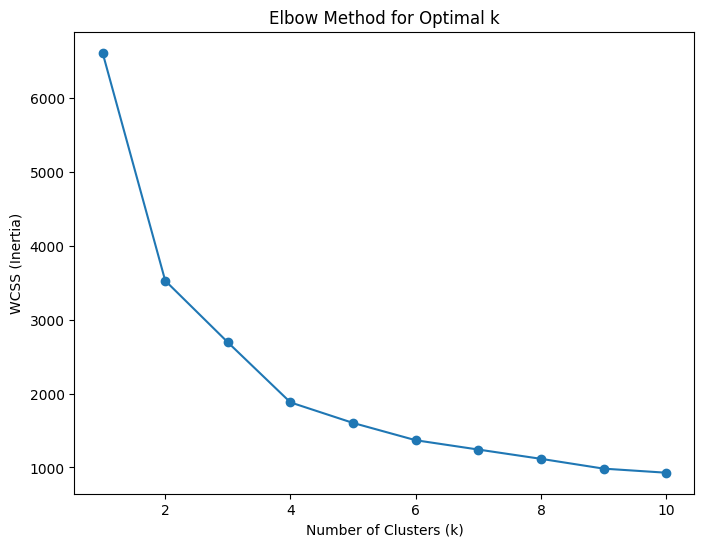

In [50]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_data)


# Test for k from 1 to 10 (or a reasonable range)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.show()

Based on the Elbow Method above, the suitable number of clusters in this case is 4

In [51]:
NUM_CLUSTER = 4

kmeans = KMeans(n_clusters=NUM_CLUSTER, random_state=42)
market_data['Cluster'] = kmeans.fit_predict(rfm_scaled)

We denote the group of customer by cluster that is:
- Customer 0 for cluster 0
- Customer 1 for cluster 1
- Customer 2 for cluster 2
- Customer 3 for cluster 3

In [52]:
cluster_colors = {
    0: 'blue',    # Color for Customer 0
    1: 'green',   # Color for Customer 1
    2: 'red',     # Color for Customer 2
    3: 'orange',  # Color for Customer 3
}

In [53]:
# prompt: sns.boxplot(x='Cluster_Id', y='Recency', data=data) # CHANGE THIS: repeat the analysis for F, M factors
# plot cluster using plotly express

# Plotly Express box plot for Recency by Cluster
fig_recency = px.box(market_data,
                     x='Cluster',
                     y='Recency',
                     color='Cluster',
                     title='Recency Distribution by Cluster',
                     color_discrete_map=cluster_colors)  # Map cluster to color)

# Update x-axis labels
fig_recency.update_layout(
    xaxis=dict(
        tickvals=[0, 1, 2, 3],  # Assuming clusters are 0 and 1
        ticktext=["Customer 0", "Customer 1", "Customer 2", "Customer 3"]  # Replace with new labels
    ),
    xaxis_title = "Customer Type",
    width=WIDTH_PLOTLY,
    height=HEIGHT_PLOTLY,
)

fig_recency.show()


# Plotly Express box plot for Frequency by Cluster
fig_frequency = px.box(market_data, x='Cluster', y='Frequency', color='Cluster',
                      title='Time Frequency of Purchasing by Customer Type',
                    color_discrete_map = cluster_colors)
fig_frequency.update_layout(
    xaxis=dict(
        tickvals=[0, 1, 2, 3],  # Assuming clusters are 0 and 1
        ticktext=["Customer 0", "Customer 1", "Customer 2", "Customer 3"]  # Replace with new labels
    ),
    xaxis_title = "Customer Type",
    width=WIDTH_PLOTLY,
    height=HEIGHT_PLOTLY
)

fig_frequency.show()

# Plotly Express box plot for Monetary Value by Cluster
fig_monetary = px.box(market_data, x='Cluster', y='Monetary', color='Cluster',
                      title='Total Money Spending by Customer Type',
                      color_discrete_map = cluster_colors)
fig_monetary.update_layout(
    xaxis=dict(
        tickvals=[0, 1, 2, 3],  # Assuming clusters are 0 and 1
        ticktext=["Customer 0", "Customer 1", "Customer 2", "Customer 3"]  # Replace with new labels
    ),
    xaxis_title = "Customer Type",
    width=WIDTH_PLOTLY,
    height=HEIGHT_PLOTLY
)
fig_monetary.update_layout(width=WIDTH_PLOTLY, height=HEIGHT_PLOTLY)
fig_monetary.show()

RFM analysis assigns scores for Recency, Frequency, and Monetary values, typically from 1 to 5. After calculating the scores, you can combine them into segments. For example:

- High Recency, High Frequency, High Monetary (5-5-5): Your most loyal and valuable customers.
- Low Recency, High Frequency, High Monetary (1-5-5): Lapsed but previously loyal high-value customers.
- High Recency, Low Frequency, Low Monetary (5-1-1): New customers with low engagement.
- Low Recency, Low Frequency, Low Monetary (1-1-1): Least engaged customers.


**The results of the K-Means Analysis**

- Customer 2 (5-5-5): (*Most Loyal*) Is the most loyal and valuable since they are the customers who purchased frequently, spent a lot and recently bought from the stores
- Customer 0 (1-5-5): (*At risk*) Used to buy a lot from the customer but they haven't returned for a long time
- Customer 1 (5-1-1): (*Newbie*) These are the new customers with low engagement to the stores
- Customer 3 (1-1-1): (*Those who do not care*) These are the least engaged customers

**Retention Strategies**: which clusters in your analysis should be targeted with retention strategies, and how?

Customer 2: Champions (Should be treated like Kings or Queens)
- Offer exclusive perks (e.g., VIP programs, early access to products, special offers).
- Send personalized thank-you messages or loyalty rewards.
- Upsell and cross-sell relevant products.

Customer 0: Lapsed Customers (At Risk)

- Conduct surveys to understand why they stopped purchasing.
- Provide deep discounts or special deals to win them back (some special offers returning back for them)
- Highlight any new product features or improvements.

Customer 1: New Customers

- Welcome them with onboarding emails or tutorials.
- Offer introductory discounts or free shipping.
- Showcase your brand story to build an emotional connection.


Customer 3: Lost Causes (Spent the least money marketing on theis category)
- Minimize marketing costs for this group unless part of a broader strategy.
- Use low-cost reactivation strategies like newsletters.

**Promotional Targeting**: which clusters can be targeted with promotional campaigns,and how?

In [54]:
# prompt: Group the cluster and plot the barchart (count the sum of that) with the Response variable

import plotly.graph_objects as go

# Assuming 'market_data' and 'Cluster' column exist from previous code

# Group data by 'Cluster' and 'Response', then count occurrences
cluster_response_counts = market_data.groupby(['Cluster', 'Response']).size().reset_index(name='Count')

# Create the bar chart
fig = go.Figure()
for cluster in cluster_response_counts['Cluster'].unique():
    cluster_data = cluster_response_counts[cluster_response_counts['Cluster'] == cluster]
    fig.add_trace(go.Bar(
        x=cluster_data['Response'],
        y=cluster_data['Count'],
        text=cluster_data['Count'],  # Add the count values as text
        textposition='auto',        # Position the text automatically (center or above bars)
        name=f'Customer {cluster}',
        marker=dict(color=cluster_colors[cluster])
    ))



# fig.for_each_trace(lambda trace: trace.update(
#     labels=["Customer 0" if label == 0 else "Customer 1" for label in cluster_response_counts['Cluster']]
# ))

fig.update_layout(
    xaxis=dict(
        tickvals=[0, 1],  # Assuming clusters are 0 and 1
        ticktext=["Did Not Response", "Responsed"]  # Replace with new labels
    ),
    title='Last Campaign Response by Customer Type',
    xaxis_title='Response',
    yaxis_title='Number of Response',
    barmode='group',  # Display bars side-by-side for comparison
    width=WIDTH_PLOTLY,  # Assuming WIDTH_PLOTLY is defined
    height=HEIGHT_PLOTLY  # Assuming HEIGHT_PLOTLY is defined
)

fig.show()

In [55]:
import plotly.graph_objects as go

# Group data by 'Cluster' and 'Response', then count occurrences
cluster_response_counts = market_data.groupby(['Cluster', 'Response']).size().reset_index(name='Count')

# Loop through each unique response and create a pie chart for that response
response_types = cluster_response_counts['Response'].unique()

for response in response_types:
    # Filter data for the current response
    response_data = cluster_response_counts[cluster_response_counts['Response'] == response]

    # Map cluster numbers to "Customer" labels
    response_data['Cluster'] = response_data['Cluster'].apply(lambda x: f'Customer {x}')

    # Create pie chart
    fig = go.Figure()
    fig.add_trace(go.Pie(
        labels=response_data['Cluster'],   # Clusters as labels
        values=response_data['Count'],    # Count of each cluster
        textinfo='percent',         # Show label and percentage
        hoverinfo='label+value+percent',  # Detailed hover information
        name=f'Response {response}',   # Legend name
        marker=dict(colors=[cluster_colors[cluster] for cluster in range(len(response_data['Cluster'].unique()))])
    ))


    # Update layout
    fig.update_layout(
        title=f'Proportion of Customer Who Did not Response' \
                if response == 0 else
                f'Proportion of Customer Who had Response',
        showlegend=True,  # Show legends for clarity
        width=WIDTH_PLOTLY,  # Assuming WIDTH_PLOTLY is defined
        height=HEIGHT_PLOTLY,  # Assuming HEIGHT_PLOTLY is defined
        legend=dict(
        traceorder="normal"  # Default order (Customer 0 to Customer 3 as per their order in the data)
    )
    )

    # Show the plot
    fig.show()


Insights from the Chart
 - Customer 0:
High proportion of "Did Not Respond" (460) with some engagement (86 responded).
 - Customer 1:
Highest "Did Not Respond" count (516) and low engagement (80 responded).
 - Customer 2:
Relatively balanced, with a significant number responding (145) but also a large "Did Not Respond" group (349).
 - Customer 3:
Majority "Did Not Respond" (547) and very low engagement (22 responded).

***Let's fill this in***

 Customer 0: Previously High-Value At-Risk Customers
 - Goal: Re-engage customers who used to buy but are showing signs of disengagement.

Customer 1: New Customers with Low Engagement
 - Goal: Encourage these customers to become repeat buyers.

Customer 2: Loyal and Valuable Customers
 - Goal: Retain and maximize value from highly engaged, responsive customers.

Customer 3: Least Engaged Customers
 - Goal: Reactivate or deprioritize if re-engagement is unlikely.


Prioritization of Efforts
- High Priority: Customer 0 (At Risk) and Customer 2 (Loyal)
These groups have the most potential for revenue growth.
- Moderate Priority: Customer 1 (New Customers)
These customers can be nurtured into loyal buyers.
- Low Priority: Customer 3 (Least Engaged)
Invest minimally unless re-engagement seems feasible.

**High-Value Customers**: who are the high-value customers and what are their
spending patterns?

In [56]:
import plotly.express as px
import plotly.graph_objects as go

# Define high-value customers (top 25% of MntTotal)
high_value_threshold = market_data['MntTotal'].quantile(0.75)
high_value_customers = market_data[market_data['MntTotal'] >= high_value_threshold]
low_value_customers = market_data[market_data['MntTotal'] < high_value_threshold]

# Spending breakdown by product categories for high-value customers
product_categories = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                      'MntSweetProducts', 'MntGoldProds']
high_value_spending = high_value_customers[product_categories].mean()

# Bar Chart: Spending patterns for high-value customers
fig = px.bar(
    high_value_spending.sort_values().reset_index(),
    x='index',
    y=0,
    title='Average Spending by High-Value Customers (Top 25%)',
    labels={'index': 'Product Category', 0: 'Average Spending'},
    color_discrete_sequence=['skyblue'],
    text=0  # Add values as text on the bars
)

fig.update_traces(
    texttemplate='%{text:.2f}',  # Format the text values (2 decimal places)
    textposition='outside'      # Position the text outside the bars
)

fig.update_layout(
    xaxis_title="Product Category",
    yaxis_title="Average Spending",
    xaxis_tickangle=45,
    width=WIDTH_PLOTLY,  # Replace WIDTH_PLOTLY if defined
    height=HEIGHT_PLOTLY  # Replace HEIGHT_PLOTLY if defined
)

fig.show()

# Compare spending patterns for high-value vs. low-value customers
spending_data = market_data[['MntTotal', 'MntWines', 'MntFruits', 'MntMeatProducts',
                              'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].copy()
spending_data['CustomerType'] = ['High Value' if x >= high_value_threshold else 'Low Value'
                                 for x in market_data['MntTotal']]

# Melt data for easier plotting
spending_melted = spending_data.melt(
    id_vars='CustomerType',
    value_vars=product_categories,
    var_name='Category',
    value_name='Spending'
)

# Boxplot: Spending patterns comparison
fig = px.box(
    spending_melted,
    x='Category',
    y='Spending',
    color='CustomerType',
    title='Spending Patterns: High-Value vs. Low-Value Customers',
    labels={'Spending': 'Spending', 'Category': 'Product Category'},
    color_discrete_map={'High Value': 'blue', 'Low Value': 'red'}
)
fig.update_layout(
    xaxis_tickangle=45,
    legend_title="Customer Type",
    width=WIDTH_PLOTLY,  # Assuming WIDTH_PLOTLY is defined
    height=HEIGHT_PLOTLY,  # Assuming HEIGHT_PLOTLY is defined
)
fig.show()


MntWines:

- High-value customers spend significantly more on wine compared to low-value customers.
- Their spending is not only higher on average but also shows a wider range (larger interquartile range and outliers reaching above 1500).

MntFruits:

- Both high-value and low-value customers have relatively low spending on fruits.
- High-value customers spend marginally more, but the difference is minimal compared to other categories.

MntMeatProducts:

- High-value customers spend significantly more on meat products than low-value customers, with a higher median and greater variation.
- Meat is likely a key category contributing to high-value customer status.

MntFishProducts:

- Spending on fish is relatively low across both groups, but high-value customers still exhibit slightly higher spending and variability.

MntSweetProducts:

- Similar to fish products, spending on sweets is generally low across both groups.
- High-value customers spend slightly more, but the difference is not as pronounced.

MntGoldProds:

- Spending on gold products shows a noticeable difference between the groups.
- High-value customers spend significantly more on gold products, though the range of spending is narrower compared to wine and meat.

**Actionable Insights:**
1. Retention and Engagement for High-Value Customers:

    - Focus marketing efforts on wine, meat, and gold products, as these are the most relevant categories for high-value customers.
    - Offer premium loyalty rewards or personalized offers in these categories to retain these customers.

2. Upsell Opportunities for Low-Value Customers:

    - Target low-value customers with promotions or bundle deals in categories where they already spend (e.g., fruits, sweets, fish).
    - Gradually introduce premium products (e.g., wine and gold products) to encourage higher spending.

3. Cross-Selling:

    - Use insights from high-value customer preferences to cross-sell complementary products to both groups (e.g., pair wine with meat or fish).

In [57]:
import pandas as pd
import plotly.express as px

# Define high-value customers (top 25% of MntTotal)
high_value_threshold = market_data['MntTotal'].quantile(0.75)
high_value_customers = market_data[market_data['MntTotal'] >= high_value_threshold]

# Count high-value customers in each cluster
high_value_cluster_counts = high_value_customers.groupby('Cluster').size().reset_index(name='Count')

# Ensure all clusters (0 to 3) are included in the output
all_clusters = pd.DataFrame({'Cluster': [0, 1, 2, 3]})
high_value_cluster_counts = (
    high_value_customers.groupby('Cluster').size().reset_index(name='Count')
    .merge(all_clusters, on='Cluster', how='right')  # Merge with all clusters
    .fillna(0)  # Fill missing counts with 0
)
high_value_cluster_counts['Count'] = high_value_cluster_counts['Count'].astype(int)  # Ensure counts are integers

# Display the updated DataFrame
print(high_value_cluster_counts)


# Create a bar chart using go.Figure
fig = go.Figure()

# Loop through each cluster and add a bar trace
for cluster in high_value_cluster_counts['Cluster'].unique():
    cluster_data = high_value_cluster_counts[high_value_cluster_counts['Cluster'] == cluster]
    fig.add_trace(go.Bar(
        x=[f'Customer {cluster}'],  # Label for the x-axis
        y=cluster_data['Count'],    # Number of high-value customers in this cluster
        name=f'Customer {cluster}', # Legend label
        marker=dict(color=cluster_colors[cluster]),  # Apply the cluster color
        text=cluster_data['Count'],  # Display the count as text
        textposition='outside'       # Position the text outside the bars
    ))

# Update layout
fig.update_layout(
    title='High-Value Customers by Cluster',
    xaxis_title="Customer Type",
    yaxis_title="Number of High-Value Customers",
    xaxis=dict(
        tickvals=[f'Customer {c}' for c in cluster_colors.keys()],
        ticktext=[f'Customer {c}' for c in cluster_colors.keys()]
    ),
    width=WIDTH_PLOTLY,
    height=HEIGHT_PLOTLY,
    showlegend=False  # Hide legend since it's redundant with the bar colors
)

# Show the plot
fig.show()


# Extract data for the pie chart
labels = [f'Customer {cluster}' for cluster in high_value_cluster_counts['Cluster']]
values = high_value_cluster_counts['Count']
colors = [cluster_colors[cluster] for cluster in high_value_cluster_counts['Cluster']]

# Create the pie chart
fig = go.Figure()

fig.add_trace(go.Pie(
    labels=labels,  # Labels for the pie chart
    values=values,  # Values for the pie chart
    marker=dict(colors=colors),  # Apply cluster colors
    hole=0.3,  # For a donut chart
    textinfo='percent+label'  # Show percentage and labels
))

# Update layout
fig.update_layout(
    title='Proportion of High-Value Customers by Cluster',
    width=WIDTH_PLOTLY,  # Replace WIDTH_PLOTLY if defined
    height=HEIGHT_PLOTLY  # Replace HEIGHT_PLOTLY if defined
)

# Show the plot
fig.show()

   Cluster  Count
0        0    297
1        1      0
2        2    255
3        3      0


**Pie Chart**: Proportion of High-Value Customers by Cluster
Overview:

The pie chart shows the proportion of high-value customers in each cluster as a percentage of the total.
Observations:

- Customer 0 accounts for 53.8% of all high-value customers, indicating that more than half of the high-value customers belong to this cluster.
- Customer 2 accounts for 46.2%, making it the second-largest group.
- Customer 1 and Customer 3 contribute 0%, as they do not have any high-value customers.

Implications:

- Focus retention strategies on Customer 0, as it holds the majority of high-value customers. Strategies could include exclusive rewards, loyalty programs, and personalized offers. (Since Customer 0 belongs to the category at-risk customer, we should prioritize the most in this section)
- Customer 2, while smaller, still represents a significant proportion and should also be targeted with retention strategies.
- For Customer 1 and Customer 3, consider cost-effective strategies like general promotions or surveys to understand why these cluster do not have high-value customers.


**Channel Preferences**: How do purchase behaviors differ across clusters? Can
specific channels be optimized for certain customer groups?



In [58]:
# prompt: Group the cluster and plot the channels (market_data['Frequency'] = market_data[['NumDealsPurchases', 'NumCatalogPurchases',
#                                         'NumWebPurchases', 'NumStorePurchases']].sum(axis = 1))

# Calculate the sum of purchases across different channels
market_data['Frequency'] = market_data[['NumDealsPurchases', 'NumCatalogPurchases',
                                        'NumWebPurchases', 'NumStorePurchases']].sum(axis=1)

# Group data by cluster and calculate the mean frequency for each channel
cluster_channel_frequency = market_data.groupby('Cluster').agg(
    {'NumDealsPurchases': 'mean', 'NumCatalogPurchases': 'mean',
     'NumWebPurchases': 'mean', 'NumStorePurchases': 'mean', 'Frequency': 'mean'}
).reset_index()


channel_colors = {
    'NumDealsPurchases': 'green',
    'NumCatalogPurchases': 'yellow',
    'NumWebPurchases': 'orange',
    'NumStorePurchases': 'pink'
}

# Initialize a Figure
fig = go.Figure()

# Add bars for each channel
for channel, color in channel_colors.items():
    fig.add_trace(go.Bar(
        x=cluster_channel_frequency['Cluster'],  # Cluster values on the x-axis
        y=cluster_channel_frequency[channel],   # Channel frequency on the y-axis
        name=channel,                           # Legend label
        marker=dict(color=color)               # Apply custom color
    ))

# Update layout
fig.update_layout(
    barmode='group',  # Display bars side-by-side
    title='Average Purchase Frequency by Channel and Customer Cluster',
    xaxis=dict(title='Customer Type'),
    yaxis=dict(title='Average Frequency'),
    legend_title="Channel",
    width=WIDTH_PLOTLY,  # Replace WIDTH_PLOTLY if defined
    height=HEIGHT_PLOTLY  # Replace HEIGHT_PLOTLY if defined
)

# Show the plot
fig.show()


Store Purchases:
- Dominate for Customer 0 (*At-Risk*) and Customer 2 (*Champions*).
- Indicates that both groups prefer in-person shopping, with high loyalty to this channel.

Web Purchases:

- Significant for Customer 2 (*Champions*), showing strong multichannel engagement.
- Moderately significant for Customer 0 (*At-Risk*) and Customer 3 (*Least Engaged*), but not as impactful.

Deals Purchases:

- Takes up some large portion of Customer 1 and 3 comparing to other customer group
- Minimal impact on Customer 2 (*Champions*) and Customer 0 (*At-Risk*).

Catalog Purchases:

- Relevant for Customer 0 (*At-Risk*) and Customer 2 (*Champions*) but not as impactful for other groups.
- Indicates potential for targeted engagement through personalized catalogs.


***Valuable Suggestions***

Customer 0 (**At-Risk Customers**):
- Focus on Store Purchases:
    - Enhance in-store experiences to retain these customers.
    - Introduce loyalty programs for store shoppers.
- Leverage Web Purchases:
    - Use targeted online campaigns to encourage digital engagement.
- Catalog Campaigns:
    - Send personalized catalogs with special offers to re-engage.

Customer 1 (**Low Engagement Customers**):
- Deals-Focused Strategy:
    - Offer aggressive promotions and discounts.
    - Use web and email campaigns to highlight limited-time deals.
- Introduce Value-Driven Offers:
    - Bundle deals with free shipping or small perks to encourage engagement.

Customer 2 (**Champions**):
- Maximize Multichannel Potential:
    - Maintain focus on store and web purchases.
    - Provide seamless omnichannel experiences (e.g., in-store pickup for online orders).
- Reward Loyalty:
    - Strengthen loyalty programs and offer exclusive benefits for frequent shoppers.

Customer 3 (**Least Engaged Customers**):
- Reactivation Campaigns:
    - Focus on low-cost digital channels (web and email).
    - Experiment with in-store promotions or online-only discounts to identify potential engagement.

**Campaign Effectiveness**: How does campaign acceptance vary across clusters?
Are high-value clusters more likely to respond positively to campaigns?

In [59]:
# Filter campaigns to include only 1 to 5
filtered_data = market_data[market_data['AcceptedCampaign'].isin([1, 2, 3, 4, 5])]

# Group the data by cluster and accepted campaign, counting the occurrences
cluster_campaign_counts = (
    filtered_data.groupby(['Cluster', 'AcceptedCampaign'])
    .size()
    .reset_index(name='Count')
)

# Create the bar chart
fig = go.Figure()
for cluster in cluster_campaign_counts['Cluster'].unique():
    subset = cluster_campaign_counts[cluster_campaign_counts['Cluster'] == cluster]
    fig.add_trace(go.Bar(
        x=subset['AcceptedCampaign'],
        y=subset['Count'],
        name=f'Customer {cluster}',  # Legend label
        marker=dict(color=cluster_colors[cluster])  # Use the color for the cluster
    ))

# Update layout for clarity and aesthetics
fig.update_layout(
    title='Customer Clusters by Accepted Campaign (1-5)',
    xaxis_title='Accepted Campaign',
    yaxis_title='Number of Customers',
    barmode='group',  # Grouped bar chart
    width=800,  # Adjust width as needed
    height=600,  # Adjust height as needed
    legend_title="Customer Clusters"  # Add legend title
)

# Show the plot
fig.show()

**1. How Does Campaign Acceptance Vary Across Clusters?**

Customer 0 (Blue - At-Risk Customers):

- Highest acceptance for Campaign 1, 4 and 5 indicating that these campaigns resonate well with this group.
- Minimal acceptance for Campaign 3, showing that early campaigns may not have been effective for this group.

Customer 1 (Green - Low-Engagement Customers):

- Peak acceptance for Campaign 3, indicating interest in specific campaign offers.
- Very little engagement with other campaigns, suggesting selective responsiveness.
- Particularly low response to Campaigns 1, 2, and 5, indicating these campaigns do not align well with their preferences.


Customer 2 (Red - Champions):

- Strong acceptance across Campaigns 4 and 5, showing high responsiveness to these recent campaigns.
- Significant acceptance for Campaign 3, but lower compared to Customer 1.


Customer 3 (Orange - Least Engaged Customers):

- Modest engagement with Campaign 3 but very low or negligible acceptance for other campaigns.
- This indicates that most campaigns are ineffective at engaging this cluster.

**2. Are High-Value Clusters More Likely to Respond Positively to Campaigns?**

Customer 2 (Champions):

- Being the high-value cluster, they show consistently strong responsiveness to recent campaigns (4 and 5).
- Their high acceptance rates suggest that campaigns designed with loyalty and high-value incentives resonate well with them.

Customer 0 (At-Risk Customers):

- Although this cluster includes many high-value customers, their responsiveness is selective, with Campaign 5 performing particularly well.
- Their acceptance indicates potential for re-engagement through carefully targeted campaigns.

Customer 1 (Low-Engagement Customers):

- Despite being a low-value cluster, Campaign 3 had significant engagement, indicating that targeted discounts or appealing offers could still motivate them.

Customer 3 (Least Engaged Customers):

- This cluster exhibits minimal responsiveness to campaigns, confirming that they are not likely to generate significant ROI from campaign efforts.


#### This time we will try to examine the demographics of the Customer 0 and Customer 2

Age

In [60]:
# Filtering data for clusters 0 and 2
concerned_customer = market_data[market_data['Cluster'].isin([0, 2])]

# Defining a color map for clusters
cluster_colors = {0: 'blue',  2: 'red'}

# Creating the box plot for age distribution by cluster
fig_age = px.box(
    concerned_customer,
    x='Cluster',
    y='Age',
    color='Cluster',
    title='Age Distribution by Cluster',
    color_discrete_map=cluster_colors  # Map cluster to color
)

# Displaying the plot
fig_age.show()


Education

In [61]:
# prompt: Group via Cluster and plot the bar chart regarding the educational levels (count of each category in the education)

# Assuming 'market_data' DataFrame and 'cluster_colors' dictionary are defined as in the previous code.
# Also, assuming 'concerned_customer' DataFrame is defined as in the previous code.


# Group data by cluster and education level, counting occurrences
education_counts = concerned_customer.groupby(['Cluster', 'education']).size().reset_index(name='Count')

education_idx2label = {0: 'education_2n Cycle', 1: 'education_Basic',
                       2: 'education_Graduation', 3: 'education_Master',
                       4: 'education_PhD'}

education_counts['education'] = education_counts['education'].map(education_idx2label)

# Create the bar chart
fig = go.Figure()

for cluster in education_counts['Cluster'].unique():
    subset = education_counts[education_counts['Cluster'] == cluster]
    fig.add_trace(go.Bar(
        x=subset['education'],
        y=subset['Count'],
        name=f'Customer {cluster}',
        marker=dict(color=cluster_colors[cluster])
    ))

# Update layout
fig.update_layout(
    title='Education Level Distribution by Customer Cluster',
    xaxis_title='Education Level',
    yaxis_title='Number of Customers',
    barmode='group',
    width=800,
    height=600,
    legend_title='Customer Clusters'
)

fig.show()

In [62]:
education_idx2label

{0: 'education_2n Cycle',
 1: 'education_Basic',
 2: 'education_Graduation',
 3: 'education_Master',
 4: 'education_PhD'}

In [63]:
martial_counts = concerned_customer.groupby(['Cluster', 'martial']).size().reset_index(name='Count')
martial_idx2label = {0: 'Divorced', 1: 'Married', 2: 'Single', 3: 'Together', 4: 'Widow'}


martial_counts['martial'] = martial_counts['martial'].map(martial_idx2label)

# Create the bar chart
fig = go.Figure()

for cluster in martial_counts['Cluster'].unique():
    subset = martial_counts[martial_counts['Cluster'] == cluster]
    fig.add_trace(go.Bar(
        x=subset['martial'],
        y=subset['Count'],
        name=f'Customer {cluster}',
        marker=dict(color=cluster_colors[cluster])
    ))

# Update layout
fig.update_layout(
    title='Martial Status Distribution by Customer Cluster',
    xaxis_title='Martial Status',
    yaxis_title='Number of Customers',
    barmode='group',
    width=800,
    height=600,
    legend_title='Customer Clusters'
)

fig.show()

In [64]:
martial_idx2label

{0: 'Divorced', 1: 'Married', 2: 'Single', 3: 'Together', 4: 'Widow'}

In [65]:
martial_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Cluster  10 non-null     int32 
 1   martial  10 non-null     object
 2   Count    10 non-null     int64 
dtypes: int32(1), int64(1), object(1)
memory usage: 328.0+ bytes


## Bonus Information

We shall display some information about Educational levels and Income from Customer 1

In [66]:
concerned_customer = market_data[market_data['Cluster'].isin([1])]
# print(concerned_customer['Cluster'])

education_counts = concerned_customer.groupby(['Cluster', 'education']).size().reset_index(name='Count')

education_idx2label = {0: 'education_2n Cycle', 1: 'education_Basic',
                       2: 'education_Graduation', 3: 'education_Master',
                       4: 'education_PhD'}

education_counts['education'] = education_counts['education'].map(education_idx2label)

# Create the bar chart
fig = go.Figure()

for cluster in education_counts['Cluster'].unique():
    subset = education_counts[education_counts['Cluster'] == cluster]
    fig.add_trace(go.Bar(
        x=subset['education'],
        y=subset['Count'],
        name=f'Customer {cluster}',
        # marker=dict(color=cluster_colors[cluster])
    ))

# Update layout
fig.update_layout(
    title='Education Level Distribution by Customer Cluster',
    xaxis_title='Education Level',
    yaxis_title='Number of Customers',
    barmode='group',
    width=800,
    height=600,
    legend_title='Customer Clusters'
)

fig.show()

We only compare the distribution of Income of 3 Customer groups from 0 to 2

In [67]:
# prompt: Can you draw the distribution of income of this (boxplot)

import plotly.express as px

# Assuming 'concerned_customer' DataFrame and 'cluster_colors' dictionary are defined as in the provided code.
concerned_customer = market_data[market_data['Cluster'].isin([0, 1, 2])]

fig_income = px.box(
    market_data,
    x='Cluster',
    y='Income',
    color='Cluster',
    title='Income Distribution by Customer Categories',
    color_discrete_map=cluster_colors
)

fig_income.update_layout(
    # title='Education Level Distribution by Customer Cluster',
    xaxis_title='Customer Type',
    # yaxis_title='Number of Customers',
    # barmode='group',
    width=800,
    height=600,
    legend_title='Customer Clusters'
)


fig_income.show()

In [68]:
# Assuming 'market_data' DataFrame and 'cluster_colors' dictionary are defined as in the provided code.

import plotly.graph_objects as go

# Filter data for clusters 0 and 2, and accepted campaigns 1-5
filtered_data = market_data[(market_data['Cluster'].isin([0, 2])) & (market_data['AcceptedCampaign'].isin([1, 2, 3, 4, 5]))]

# Group by cluster and campaign, summing monetary value
spending_by_cluster = filtered_data.groupby(['Cluster', 'AcceptedCampaign'])['Monetary'].sum().reset_index()

# Create the bar chart
fig = go.Figure()
for cluster in [0, 2]:  # Iterate only over clusters 0 and 2
    subset = spending_by_cluster[spending_by_cluster['Cluster'] == cluster]
    fig.add_trace(go.Bar(
        x=subset['AcceptedCampaign'],
        y=subset['Monetary'],
        name=f'Cluster {cluster}',
        marker_color=cluster_colors[cluster]
    ))

fig.update_layout(
    title='Total Spending by Cluster (0 and 2) on Accepted Campaigns (1-5)',
    xaxis_title='Accepted Campaign',
    yaxis_title='Total Spending',
    barmode='group'
)


In [69]:
# Filter data for clusters 0 and 2, and accepted campaigns 1-5
filtered_data = market_data[(market_data['Cluster'].isin([0, 2])) & (market_data['AcceptedCampaign'].isin([1, 2, 3, 4, 5]))]

# Group by cluster and campaign, summing monetary value
spending_by_cluster = filtered_data.groupby(['Cluster', 'AcceptedCampaign'])['Monetary'].sum().reset_index()

# Create the line graph
fig = go.Figure()
for cluster in [0, 2]:
    subset = spending_by_cluster[spending_by_cluster['Cluster'] == cluster]
    fig.add_trace(go.Scatter(
        x=subset['AcceptedCampaign'],
        y=subset['Monetary'],
        mode='lines+markers',  # Add markers to the line
        name=f'Cluster {cluster}',
        line=dict(color=cluster_colors[cluster])
    ))

fig.update_layout(
    title='Total Spending by Cluster (0 and 2) on Accepted Campaigns (1-5)',
    xaxis_title='Accepted Campaign',
    yaxis_title='Total Spending',
    xaxis=dict(tickmode='linear'),
)

fig.show()

In [70]:
# Filter data for clusters 0 and 2, and accepted campaigns 1-5
filtered_data = market_data[(market_data['Cluster'].isin([0, 2])) & (market_data['AcceptedCampaign'].isin([1, 2, 3, 4, 5]))]

# Group by cluster and campaign, summing monetary value
spending_by_cluster = filtered_data.groupby(['Cluster', 'AcceptedCampaign'])['Monetary'].sum().reset_index()

# Calculate total spending for each cluster
total_spending_by_cluster = spending_by_cluster.groupby('Cluster')['Monetary'].sum().reset_index()

# Create the line graph
fig = go.Figure()
for cluster in [0, 2]:
    # Filter data for the current cluster
    subset = spending_by_cluster[spending_by_cluster['Cluster'] == cluster]

    # Get total spending for the current cluster
    total_spending = total_spending_by_cluster[total_spending_by_cluster['Cluster'] == cluster]['Monetary'].values[0]

    # Calculate percentage spending for each campaign within the cluster
    subset['Percentage'] = (subset['Monetary'] / total_spending) * 100

    fig.add_trace(go.Scatter(
        x=subset['AcceptedCampaign'],
        y=subset['Percentage'],  # Plot percentage instead of absolute value
        mode='lines+markers',
        name=f'Cluster {cluster}',
        line=dict(color=cluster_colors[cluster])
    ))

fig.update_layout(
    title='Percentage Spending by Cluster (0 and 2) on Accepted Campaigns (1-5)',
    xaxis_title='Accepted Campaign',
    yaxis_title='Percentage Spending',
    xaxis=dict(tickmode='linear'),
    yaxis=dict(ticksuffix='%')  # Add percentage sign to y-axis ticks
)

fig.show()